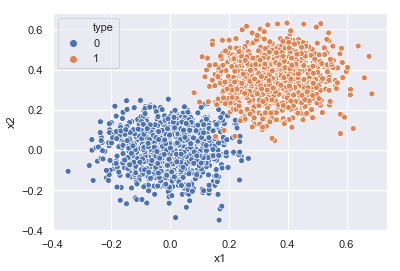

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error, roc_auc_score
import numpy as np
import keras.backend as K
import tensorflow as tf

# initiating random number
np.random.seed(11)

#### Creating the dataset

# mean and standard deviation for the x belonging to the first class
mu_x1, sigma_x1 = 0, 0.1 

# constat to make the second distribution different from the first
x2_mu_diff = 0.35

# creating the first distribution
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000),
                   'type': 0})

# creating the second distribution
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'x2': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff,
                   'type': 1})

data = pd.concat([d1, d2], ignore_index=True)


ax = sns.scatterplot(x="x1", y="x2", hue="type",
                      data=data)


In [2]:
# Splitting the dataset in training and test set
msk = np.random.rand(len(data)) < 0.8

# Roughly 80% of data will go in the training set
train_x, train_y = data[['x1','x2']][msk], data.type[msk]
# Everything else will go into the validation set
test_x, test_y = data[['x1','x2']][~msk], data.type[~msk]


In [3]:
network = Sequential()
network.add(Dense(1, input_dim = 2, activation = 'sigmoid'))
network.compile(loss = "mse", optimizer = SGD(lr = 0.01))
network.fit(train_x, train_y , nb_epoch = 1, batch_size = 1, shuffle = False)


Using TensorFlow backend.
/Users/marinamattos/anaconda3/envs/dl_env_/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/1
1618/1618 [==============================] - 5s 3ms/step - loss: 0.1573


In [12]:
network.get_weights()

[array([[1.2673584],
        [0.7997279]], dtype=float32), array([0.39887726], dtype=float32)]

In [13]:
pred_y = network.predict(test_x)
roc_auc_score(test_y, pred_y)

0.9988415710503089

In [14]:
my_perceptron = Sequential()

input_layer = Dense(1, input_dim=2, activation="sigmoid", kernel_initializer="zero")
my_perceptron.add(input_layer)

my_perceptron.compile(loss="mse", optimizer=SGD(lr=0.01))

my_perceptron.fit(train_x.values, train_y, epochs=30, batch_size=1, shuffle=True)
pred_y = my_perceptron.predict(test_x)

print('MSE on the test set:', mean_squared_error(pred_y, test_y))

Epoch 1/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.2226
Epoch 2/30
1618/1618 [==============================] - 4s 3ms/step - loss: 0.1793
Epoch 3/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1481
Epoch 4/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1255
Epoch 5/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.1087
Epoch 6/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0960
Epoch 7/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0860
Epoch 8/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0782
Epoch 9/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0718
Epoch 10/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0664
Epoch 11/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0619
Epoch 12/30
1618/1618 [==============================] - 3s 2ms/step - loss: 0.0581
E